<a href="https://colab.research.google.com/github/CaptainChuenthavorn/Artificial-text-sentiment-from-thai-news/blob/main/AI_Kietkul_text_sentiment_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 47.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pythainlp
pythainlp.__version__

'4.0.2'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# dataset = pd.read_json('thai_sentiment_dataset.json')

In [ ]:
dataset = pd.read_json('/content/drive/MyDrive/Artificial-Intelligence-project/thai_sentiment_dataset.json')
dataset.head()

,story,sentiment
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,positive
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",positive
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",positive
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,positive
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",positive


In [ ]:
df = dataset

Number of each sentiment category
 positive    9000
negative    9000
neutral     9000
Name: sentiment, dtype: int64


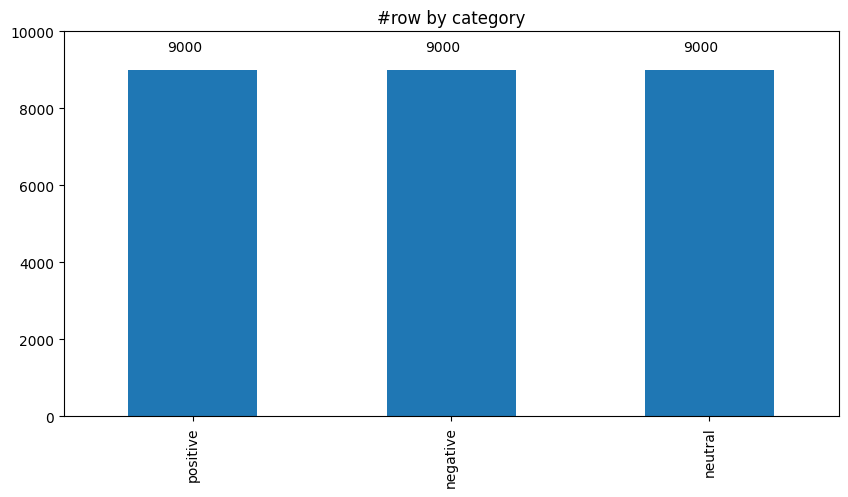

In [ ]:
print('Number of each sentiment category\n',df['sentiment'].value_counts())
row_count_by_category = df['sentiment'].value_counts()
ax = row_count_by_category.plot(kind="bar", title="#row by category", figsize=(10, 5))
ax.set_ylim(0, 10000)
for i, label in enumerate(row_count_by_category):
    ax.annotate(str(label), (i-0.1, label + 500))

In [ ]:
df.describe()

,story,sentiment
count,27000,27000
unique,25957,3
top,# ศูนย์การตั้งค่าความเป็นส่วนตัว\n\n \n\n\nเ...,positive
freq,27,9000


In [ ]:
df['story'][0]

'นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวงคมนาคม เปิดเผยถึงการเตรียมความพร้อมรองรับผู้โดยสารชาวอินเดียและไต้หวันตามนโยบายฟรีวีซ่าของรัฐบาล โดยระบุว่า ตามที่คณะรัฐมนตรี (ครม.) มีมติอนุมัติในหลักการฟรีวีซ่าให้กับนักท่องเที่ยวชาวอินเดียและไต้หวันให้อยู่ในราชอาณาจักรไทยได้ไม่เกิน 30 วัน ตั้งแต่วันที่ 10 พ.ย. 2566 - 10 พ.ค.2567 (ระยะเวลา 6 เดือน) ซึ่งจะสร้างแรงจูงใจให้กับนักท่องเที่ยวเดินทางเข้ามาเที่ยวประเทศไทย และขับเคลื่อนระบบเศรษฐกิจในภาพรวมของประเทศในช่วงปี 2566-2567ในส่วนของกระทรวงคมนาคมได้บูรณาการความร่วมมือในการเตรียมการรองรับนักท่องเที่ยวให้ดีที่สุด ตั้งแต่เดินทางเข้าสู่ประเทศตลอดจนถึงการเดินทางกลับออกจากประเทศไทย โดยได้สั่งการให้บริษัท ท่าอากาศยานไทย จำกัด (มหาชน) หรือ ทอท. เตรียมความพร้อมในด้านต่างๆ รวมถึงหาแนวทางการดำเนินการ เพื่ออำนวยความสะดวกรองรับการเดินทางของผู้โดยสาร ณ ท่าอากาศยานสุวรรณภูมิ ดอนเมือง และอื่นๆ พร้อมทั้งให้ประสานงานกับตำรวจตรวจคนเข้าเมือง (ตม.) เพื่อให้กระบวนการทุกขั้นตอนมีความสะดวกรวดเร็ว ไม่ให้ผู้โดยสารเกิดความแออัด หรือใช้เวลานานหลังจากลงจากเครื่องบินข

In [ ]:
display(df.drop_duplicates())

,story,sentiment
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,positive
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",positive
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",positive
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,positive
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",positive
...,...,...
26995,แชร์ :\n\n \n \n \n \n\n\nคุณวิภาวรรณ มหาด...,neutral
26996,นายธนวัฒน์ กิตติสุวรรณ ผู้ช่วยผู้จัดการใหญ่ ผู...,neutral
26997,Advertisement\n\n \n\n\nมติ 'ก้าวไกล' ขับ 'ไช...,neutral
26998,วันที่ 7 พฤศจิกายน 2566 เวลา 09.00 น. นายไพโร...,neutral


ตัดคำ ลบคำ stopword และ punctuation (เครื่องหมายวรรคตอน) ออกจากข้อความ ถัดมาเราจะดึง array ของ stopwords หรือคำที่ไม่ค่อยสื่อความหมาย จาก PyThaiNLP มาเก็บไว้ที่ตัวแปร thai_stopwords

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords[0:5]

['เต็มๆ', 'ไฉน', 'นี้แหล่', 'ถึงบัดนั้น', 'จน']

จากนั้นจึงทำการตัดคำ (Word Tokenize) ลบ stopword และ punctuation (เครื่องหมายวรรคตอน) ออกจากข้อความ และเปลี่ยนข้อความให้มีช่องว่างระหว่างคำ (ให้เหมือนภาษาอังกฤษ) เพื่อนำไปประมวลผลกับ Word Cloud และสร้าง Bag of Word (Bow) ง่ายขึ้น ซึ่งอันนี้ผู้เขียนคิดว่าจะง่ายต่อการประมวลผลกับ library ต่าง ๆ มากกว่าถ้าปรับข้อความให้เป็นรูปแบบนี้

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['story'].apply(text_process)
csv_output_path = '/content/drive/MyDrive/Artificial-Intelligence-project/df_with_text_token.csv'
df.to_csv(csv_output_path)

print(f"df with text_tokens representation saved to: {csv_output_path}")
df.head()


df with text_tokens representation saved to: /content/drive/MyDrive/Artificial-Intelligence-project/df_with_text_token.csv


,story,sentiment,text_tokens
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,positive,นาย สุริยะ จึง รุ่งเรือง กิจ รัฐมนตรี ว่าการ ก...
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",positive,สวยงาม ยิ่งนัก กับ เพชร เม็ด งาม ที่ หา ยาก ยิ...
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",positive,"โดย ระหว่าง วัน ดัชนี ทำ จุดสูงสุด ที่ 1,41716..."
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,positive,## ประเทศ ไทย นำเข้า ปุ๋ย ปี ละ กว่า แสน ล้าน ...
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",positive,เจ เอ เอส แอ ส เซ็ท ( J ) โชว์ กำไร Q 3 / 66 ท...


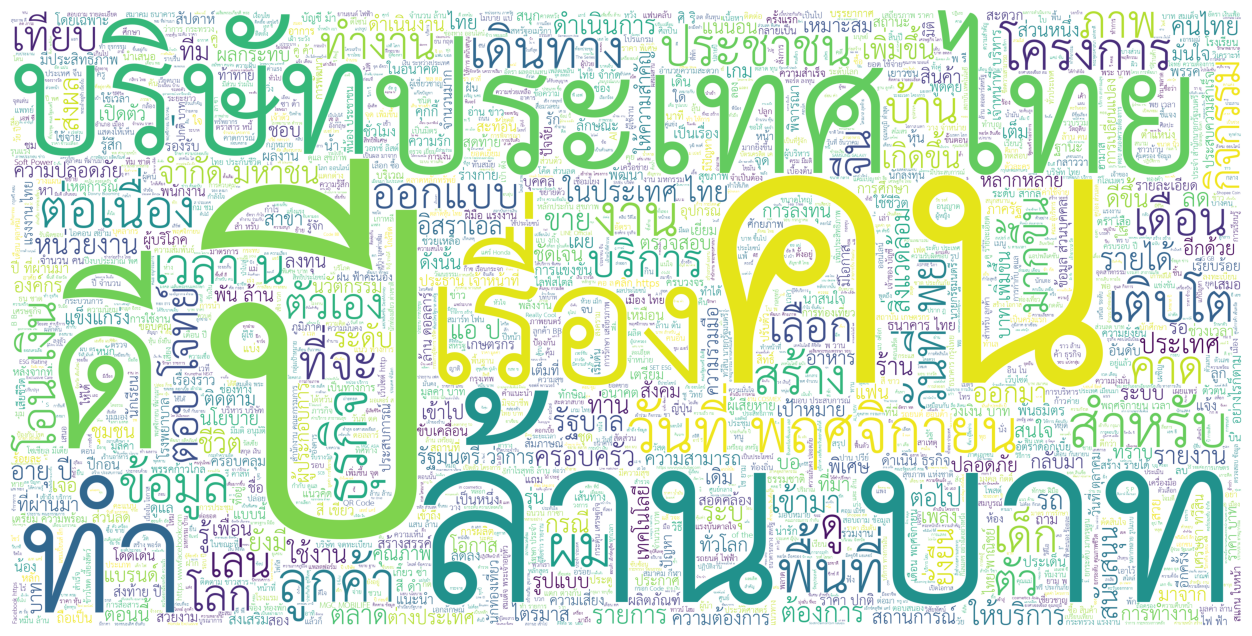

In [ ]:
# from wordcloud import WordCloud, STOPWORDS
# df_pos = df[df['sentiment'] == 'positive']
# pos_word_all = " ".join(text for text in df_pos['text_tokens'])
# reg = r"[ก-๙a-zA-Z']+"
# fp = '/content/drive/MyDrive/Artificial-Intelligence-project/THSarabunNew.ttf'
# wordcloudPos = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloudPos)
# plt.axis('off')
# plt.show()
# # save image to drive
# output_path = '/content/drive/MyDrive/Artificial-Intelligence-project/wordcloudPositiveWord.png'
# wordcloudPos.to_file(output_path)

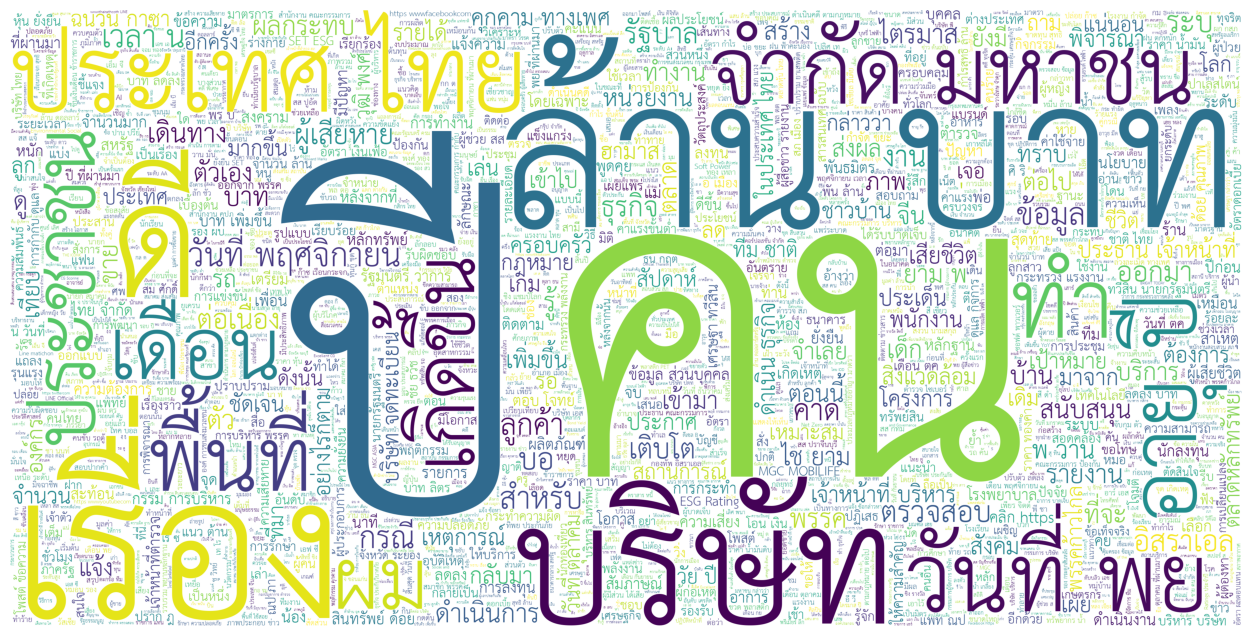

In [ ]:
# df_neg = df[df['sentiment'] == 'negative']
# neg_word_all = " ".join(text for text in df_neg['text_tokens'])
# wordcloudNeg = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
# plt.figure(figsize = (16,8))
# plt.imshow(wordcloudNeg)
# plt.axis('off')
# plt.show()
# output_path = '/content/drive/MyDrive/Artificial-Intelligence-project/wordcloudNegativeWord.png'
# wordcloudNeg.to_file(output_path)

In [ ]:
# def wordcloudPos
# def wordcloudNeg

# if have csv file from drive last time

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Artificial-Intelligence-project/train_bow.csv')
dataset.head()

In [ ]:
dataset = df

#Split Train (70%) Test (30%)

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.head()

,text_tokens
22760,รายงาน ข่าว เผย ว่า Ray-Ban แบรนด์ แว่นกันแดด ...
8854,ทุกครั้งที่ คุณ มองหา อะไร กิน ยาม บ่าย โดนัท ...
10742,วาน นี้ ( 7 พฤศจิกายน ) วุฒิ พงศ์ ทอง เหลา สมา...
20310,praewsresh 08 พย 0 0 ช่วงนี้ ค่าเงิน เยน ถูก ม...
11840,ยังคง เป็นหนึ่ง ใน ซีรี่ส์ ที่ ถูก พูดถึง เรื่...


In [ ]:
y_train.head()

22760     neutral
8854     positive
10742    negative
20310     neutral
11840    negative
Name: sentiment, dtype: object

# Word Vectorizer และ Bag-of-Words (BoW)


การจะสร้างแบบจำลองวิเคราะห์ความรู้สึกจากข้อความ จำเป็นจะต้องแปลงข้อมูลให้อยู่ในรูปแบบที่มีจำนวนของตัวแปรที่ทำกัน โดยเริ่มต้นเราจะใช้ Count Vectorizer ของ sklearn มาช่วยในการจัดการดึงคำทั้งหมดออกมาจากข้อความ และจัดเก็บในรูปแบบ Vector (จะคล้าย ๆ กับลักษณะของพจนานุกรมที่มีการระบุตัวเลข index ของแต่ละคำด้วย)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'รายงาน': 58677,
 'ข่าว': 41241,
 'เผย': 69899,
 'ว่า': 61185,
 'Ray-Ban': 25545,
 'แบรนด์': 72992,
 'แว่นกันแดด': 73580,
 'ใน': 75100,
 'ตำนาน': 47535,
 'สุด': 63436,
 'คลาสสิค': 41962,
 'ได้': 75409,
 'ประกาศ': 52138,
 'แผน': 73113,
 'ลงทุน': 59274,
 'ในประเทศ': 75126,
 'ไทย': 75494,
 'ให้': 75236,
 'เป็น': 69682,
 'ศูนย์กลาง': 61541,
 'การผลิต': 39746,
 'แห่ง': 73704,
 'ใหม่': 75228,
 'เพื่อ': 70101,
 'กระตุ้น': 38503,
 'เกิด': 67119,
 'แรง': 73450,
 'ขับเคลื่อน': 40990,
 'ตลาด': 47029,
 'เอเชีย': 72081,
 'โดย': 74167,
 'ทุ่ม': 49326,
 'เงินลงทุน': 67737,
 'ถึง': 48149,
 '16,000': 4045,
 'ล้าน': 60266,
 'บาท': 51552,
 'ก่อสร้าง': 40549,
 'โรงงาน': 74668,
 'ผลิต': 53310,
 'เลนส์': 70831,
 'สายตา': 62920,
 'กรอบ': 38423,
 'แว่นตา': 73581,
 'และ': 73522,
 'แว่นตากันแดด': 73582,
 'จังหวัด': 43887,
 'ระยอง': 58257,
 'ของ': 40848,
 'นี้': 50642,
 'มี': 56836,
 'พื้นที่': 55298,
 '220,000': 5468,
 'ตารางเมตร': 47508,
 'กำลัง': 40207,
 'สูงสุด': 63576,
 'ที่': 49145,
 '50,000': 8183,
 'ชิ้

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
csv_output_path = '/content/drive/MyDrive/Artificial-Intelligence-project/train_bow.csv'
train_bow_df.to_csv(csv_output_path)

print(f"Bag-of-words representation saved to: {csv_output_path}")

NameError: name 'cvec' is not defined

# Testing in model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

# Test inference text with model above

In [ ]:
my_text = 'นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวงคมนาคม เปิดเผยถึงการเตรียมความพร้อมรองรับผู้โดยสารชาวอินเดียและไต้หวันตามนโยบายฟรีวีซ่าของรัฐบาล โดยระบุว่า ตามที่คณะรัฐมนตรี (ครม.) มีมติอนุมัติในหลักการฟรีวีซ่าให้กับนักท่องเที่ยวชาวอินเดียและไต้หวันให้อยู่ในราชอาณาจักรไทยได้ไม่เกิน 30 วัน ตั้งแต่วันที่ 10 พ.ย. 2566 - 10 พ.ค.2567 (ระยะเวลา 6 เดือน) ซึ่งจะสร้างแรงจูงใจให้กับนักท่องเที่ยวเดินทางเข้ามาเที่ยวประเทศไทย และขับเคลื่อนระบบเศรษฐกิจในภาพรวมของประเทศในช่วงปี 2566-2567ในส่วนของกระทรวงคมนาคมได้บูรณาการความร่วมมือในการเตรียมการรองรับนักท่องเที่ยวให้ดีที่สุด ตั้งแต่เดินทางเข้าสู่ประเทศตลอดจนถึงการเดินทางกลับออกจากประเทศไทย โดยได้สั่งการให้บริษัท ท่าอากาศยานไทย จำกัด (มหาชน) หรือ ทอท. เตรียมความพร้อมในด้านต่างๆ รวมถึงหาแนวทางการดำเนินการ เพื่ออำนวยความสะดวกรองรับการเดินทางของผู้โดยสาร ณ ท่าอากาศยานสุวรรณภูมิ ดอนเมือง และอื่นๆ พร้อมทั้งให้ประสานงานกับตำรวจตรวจคนเข้าเมือง (ตม.) เพื่อให้กระบวนการทุกขั้นตอนมีความสะดวกรวดเร็ว ไม่ให้ผู้โดยสารเกิดความแออัด หรือใช้เวลานานหลังจากลงจากเครื่องบินขณะเดียวกัน ให้จัดตั้งศูนย์บัญชาการร่วม (Single Command Center) เพื่อเป็นศูนย์ประสานงานร่วมของทุกหน่วยงานที่เกี่ยวข้องกับการให้บริการในทุกขั้นตอนในท่าอากาศยาน ทำหน้าที่ตรวจสอบติดตามการให้บริการ และกวดขันการบริหารการจราจรบริเวณหน้าท่าไม่ให้เกิดความแออัดหนาแน่น และเก็บบันทึกข้อมูลการให้บริการ ภาพถ่ายกล้องวงจรปิด เพื่อนำมาวิเคราะห์ประกอบการให้บริการให้ดียิ่งขึ้นนอกจากนี้ ยังได้มอบหมายให้หน่วยงานที่เกี่ยวข้อง เตรียมการในด้านต่างๆ เพื่อให้นักท่องเที่ยวได้รับความสะดวกสบายตลอดการเดินทางในประเทศไทย ประกอบด้วย การเตรียมความพร้อมท่าอากาศยานในภูมิภาค การเตรียมความพร้อมการเดินทางภายในกรุงเทพมหานคร (กทม.) การเตรียมความพร้อมการเดินทางไปต่างจังหวัดทางรถไฟและรถโดยสาร การเตรียมความพร้อมการเดินทางในต่างจังหวัด และการเตรียมความพร้อมสำหรับความปลอดภัยในการท่องเที่ยวทางน้ำสำหรับจำนวนนักท่องเที่ยวต่างชาติที่เดินทางมายังประเทศไทยนั้น จากข้อมูลกองเศรษฐกิจการท่องเที่ยวและกีฬาข้อมูล กระทรวงการท่องเที่ยวและกีฬา ณ วันที่ 6 พ.ย. 2566 พบว่า ตั้งแต่วันที่ 30 ต.ค. – 5 พ.ย.2566 มีนักท่องเที่ยวต่างชาติ จำนวนทั้งสิ้น 557,554 คน คิดเป็นจำนวนนักท่องเที่ยวต่างชาติที่เดินทางเข้าประเทศไทยเฉลี่ยวันละ 79,651 คนโดยนักท่องเที่ยวจากมาเลเซีย เป็นนักท่องเที่ยวที่เดินทางเข้าไทยมากที่สุด จำนวน 73,297 คน รองลงมา ได้แก่ทำให้จำนวนนักท่องเที่ยวสะสมตั้งแต่วันที่ 1 ม.ค. 2566 ที่ผ่านมา รวมทั้งสิ้น 22,622,522 คน สร้างรายได้จากการใช้จ่ายของนักท่องเที่ยวต่างชาติแล้ว 954,239 ล้านบาท'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

In [ ]:
my_text = 'ไม่ตรงปกส่งช้าครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions